<a href="https://colab.research.google.com/github/juandesages/PDI.Entregas/blob/main/TP8/TPN8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Último TP a Implementar (TP8):
Implementar un aplicativo que permita abrir una imagen y con esta obtener:
• Downsampling X2 (mostrando la imagen resultado al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
• Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
• Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering aleatorio, y difusión del error por scan-line.
Todas las funciones de Downsamplig, Upsampling y Cuantización deben ser desarrolladas como funciones propias y NO con funciones de biblioteca. Les sugiero recorrer la imagen mediante ciclos for anidados para una fácil implementación.
Fecha de entrega: 08 de Dicembre. -> 10/12


In [86]:

import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.transform import rescale
import math
from PIL import ImageTk, Image

#--------- TPN 1 ---------
#Cargar imagen
def load_image(filename):
   
    im_in= np.clip(imageio.imread(filename)/255.,0.,1.).astype(np.float)
    return im_in
def image_type(im):
  if len(im.shape)==2:
      image_type = 'gray'
    
  if len(im.shape)==3: # la imagen es de tipo RGB
      image_type = 'rgb'
  return image_type

#--------- TPN 2 ---------
#matriz para transformar de RGB a YIQ
MAT_YIQ = np.array([[0.299, 0.595716, 0.211456],
                    [0.587, -0.274453, -0.522591],
                    [0.114, -0.321263, 0.311135]])
#funcion para pasar una imagen RGB a YIQ
def rgb2yiq(_im):
    _yiq = np.matmul(_im.reshape((-1,3)), MAT_YIQ).reshape(_im.shape)
    return _yiq
#funcion para modificar valores de Y y de IQ
def scale_yiq(_yiq, alpha, beta):
    _yiq[:, :, 0] *= alpha
    _yiq[:, :, 1:3] *= beta   
    return _yiq
#funcion para pasar la imagen de YIQ a RGB
def yiq2rgb(_yiq):
    _rgb = np.matmul(_yiq.reshape((-1,3)),np.linalg.inv(MAT_YIQ)).reshape(_yiq.shape)
    return _rgb

def clip_rgb(rgb):
  return np.clip(rgb, a_min=[0,-0, 0], a_max=[255, 255, 255])

def clip_yiq(yiq):
  return np.clip(yiq, a_min=[0,-0.5957, -0.5226], a_max=[1, 0.5957, 0.5226])

def Upsampling_constant(imagen):  
    pixels= imagen
    imagen2 = np.zeros((im.shape[0]*2,im.shape[1]*2))
    pixels2=imagen2
    
    if image_type(im) == 'gray':
      for k in range(imagen.shape[1]):
        for j in range(imagen.shape[0]):
          pixels2[j*2,k*2]=(pixels[j,k])
          pixels2[2*j+1,2*k]=(pixels[j,k])
          pixels2[2*j,2*k+1]=(pixels[j,k])
          pixels2[2*j+1,2*k+1]=(pixels[j,k])
    if image_type == 'rgb':
      for k in range(imagen.shape[1]):
        for j in range(imagen.shape[0]):
          pixels2[j*2,k*2]=(pixels[j,k][0],pixels[j,k][1],pixels[j,k][2])
          pixels2[2*j+1,2*k]=(pixels[j,k][0],pixels[j,k][1],pixels[j,k][2])
          pixels2[2*j,2*k+1]=(pixels[j,k][0],pixels[j,k][1],pixels[j,k][2])
          pixels2[2*j+1,2*k+1]=(pixels[j,k][0],pixels[j,k][1],pixels[j,k][2])
    return imagen2

def Upsampling_bilineal(imagen):
    pixels=imagen
    imagen2 = np.zeros((im.shape[0]*2,im.shape[1]*2))
    pixels2=imagen2
    if image_type(im) == 'gray':
      for k in range(imagen.shape[1]):
        for j in range(imagen.shape[0]):
          pixels2[j*2,k*2]=(pixels[j,k])
          x=k+1
          y=j+1              
          if(x>imagen.shape[1]-1):
            x=imagen.shape[1]-1
          if(y>imagen.shape[0]-1):
            y=imagen.shape[0]-1  
          pixels2[2*j+1,2*k]=(pixels[j,k]+pixels[y,k])//2
          pixels2[2*j,2*k+1]=(pixels[j,k]+pixels[j,x])//2 
          pixels2[2*j+1,2*k+1]=(pixels[j,k]+pixels[y,k]+pixels[j,k]+pixels[j,x])//4
      if image_type(im) == 'rgb':
        for k in range(imagen.shape[1]):
          for j in range(imagen.shape[0]):
            pixels2[j*2,k*2]=(pixels[j,k])
            x=k+1
            y=j+1              
            if(x>imagen.shape[1]-1):
              x=imagen.shape[1]-1
            if(y>imagen.shape[0]-1):
              y=imagen.shape[0]-1  
            r1=(pixels[j,k][0]+pixels[y,k][0])//2
            g1=(pixels[j,k][1]+pixels[y,k][1])//2
            b1=(pixels[j,k][2]+pixels[y,k][2])//2
            pixels2[2*j+1,2*k]=(r1,g1,b1)
            r2=(pixels[j,k][0]+pixels[j,x][0])//2 
            g2=(pixels[j,k][1]+pixels[j,x][1])//2 
            b2=(pixels[j,k][2]+pixels[j,x][2])//2 
            pixels2[2*j,2*k+1]=(r2,g2,b2)
            r3=(pixels[j,k][0]+pixels[y,k][0]+pixels[j,k][0]+pixels[j,x][0])//4
            g3=(pixels[j,k][1]+pixels[y,k][1]+pixels[j,k][1]+pixels[j,x][1])//4
            b3=(pixels[j,k][2]+pixels[y,k][2]+pixels[j,k][2]+pixels[j,x][2])//4
            pixels2[2*j+1,2*k+1]=(r3,g3,b3)
        for k in range(imagen2.shape[1]):
          pixels2[imagen2.shape[0]-1,k]=pixels2[imagen2.shape[0]-2,k]
        for j in range(imagen2.shape[0]):
          pixels2[j,imagen2.shape[1]-1]=pixels2[j,imagen2.shape[1]-2]
        pixels2[imagen2.shape[0]-1,imagen2.shape[1]-1]=(pixels[imagen.shape[0]-1,imagen.shape[1]-1][0],pixels[imagen.shape[0]-1,imagen.shape[1]-1][1],pixels[imagen.shape[0]-1,imagen.shape[1]-1][2])
                     
    
    return imagen2

def Upsampling_bicubic(imagen):
    pixels=imagen
    imagen2 = np.zeros((im.shape[0]*2,im.shape[1]*2))
    pixels2=imagen2
    
    if image_type(im) == 'gray':
      for k in range(imagen.shape[1]):
        for j in range(imagen.shape[0]):
          pixels2[j*2,k*2]=(pixels[j,k])
          x=k+1
          y=j+1
          x2=k+2
          y2=j+2
          s=k-1
          r=j-1
          pixels2[j*2,k*2]=(pixels[j,k])
          pixels2[2*j+1,2*k]=(pixels[j,k])
          pixels2[2*j,2*k+1]=(pixels[j,k])
          pixels2[2*j+1,2*k+1]=(pixels[j,k])
          if(x>imagen.shape[1]-1):
                  x=imagen.shape[1]-1
          if(y>imagen.shape[0]-1):
                  y=imagen.shape[0]-1
          if(x2>imagen.shape[1]-1):
                  x2=imagen.shape[1]-1
          if(y2>imagen.shape[0]-1):
                  y2=imagen.shape[0]-1
          if(s<0):
                  s=0
          if(r<0):
                  r=0
        pixels2[2*j+1,2*k]=int(pixels[j,k]+pixels[y,k])*(5/8)-(1/8)*(pixels[r,k]+pixels[y2,k])
        pixels2[2*j,2*k+1]=int(pixels[j,k]+pixels[j,x])*(5/8)-(1/8)*(pixels[j,s]+pixels[j,x2])
        pixels2[2*j+1,2*k+1]=(pixels[j,k]+pixels[y,k]+pixels[j,k]+pixels[j,x])//4
    
    
    return imagen2

def Downsampling_constant(imagen):
    pixels=imagen
    imagen2 = np.zeros((im.shape[0]//2,im.shape[1]//2))
    pixels2=imagen2
    if image_type(im) == 'gray':
      for x in range(imagen2.shape[1]):
        for y in range(imagen2.shape[0]):
          pixels2[y,x]=(pixels[2*y,2*x])
    if image_type == 'rgb':
      for x in range(imagen2.shape[1]):
        for  y in range(imagen2.shape[0]):
          pixels2[y,x]=(pixels[2*y,2*x][0],pixels[2*y,2*x][1],pixels[2*y,2*x][2])
    return imagen2

def Downsampling_bilineal(imagen):
    pixels=imagen
    imagen2 = np.zeros((im.shape[0]//2,im.shape[1]//2))
    pixels2=imagen2
    if image_type(im) == 'gray':
      for x in range(imagen2.shape[1]):
        for y in range(imagen2.shape[0]):
          y1=2*y-1
          y2=2*y+1
          x1=2*x-1
          x2=2*x+1
          if(y1<0):
            y1=0
          if(y2>imagen.shape[0]):
            y2=imagen.shape[0]
          if(x1<0):
            x1=0
          if(x2>imagen.shape[1]):
            x2=imagen.shape[1]
          pixels2[y,x]=(pixels[2*y,x2]+pixels[2*y,x1]+pixels[y1,2*x]+pixels[y2,2*x])//4   
    if image_type == 'rgb':
      for x in range(imagen2.shape[1]):
        for  y in range(imagen2.shape[0]):
              y1=2*y-1
              y2=2*y+1
              x1=2*x-1
              x2=2*x+1
              
              if(y1<0):
                  y1=0
              if(y2>imagen.shape[0]):
                  y2=imagen.shape[0]
              if(x1<0):
                  x1=0
              if(x2>imagen.shape[1]):
                  x2=imagen.shape[1]
                  
              r=(pixels[2*y,x2][0]+pixels[2*y,x1][0]+pixels[y1,2*x][0]+pixels[y2,2*x][0])//4
              g=(pixels[2*y,x2][1]+pixels[2*y,x1][1]+pixels[y1,2*x][1]+pixels[y2,2*x][1])//4
              b=(pixels[2*y,x2][2]+pixels[2*y,x1][2]+pixels[y1,2*x][2]+pixels[y2,2*x][2])//4 
              pixels2[y,x]=(r,g,b)
     
    return imagen2

def Downsampling_bicubic(imagen):
  pixels=imagen
  imagen2 = np.zeros((im.shape[0]//2,im.shape[1]//2))
  pixels2=imagen2
  if image_type(im) == 'gray':
      for x in range(imagen2.shape[1]-1):
        for y in range(imagen2.shape[0]-1):
           y1=2*y-1
           y2=2*y+1
           x1=2*x-1
           x2=2*x+1
           y3=2*y-2
           y4=2*y+2
           x3=2*x-2
           x4=2*x+2
           if(y1<0):
             y1=0
           if(y2>imagen.shape[0]):
             y2=imagen.shape[0]
           if(x1<0):
             x1=0
           if(x2>imagen.shape[1]):
             x2=imagen.shape[1]
           if(x3<0):
             x3=0
           if(x4>imagen.shape[1]):
             x4=imagen.shape[1]
           if(y3<0):
             y3=0
           if(y4>imagen.shape[0]):
             y4=imagen.shape[0]
           
           pixels2[y,x]=int((((pixels[y1,x1]+pixels[y1,x3]+pixels[y3,x1]+pixels[y3,x3])//4)+((pixels[y1,x2]+pixels[y1,x2]+pixels[y3,x4]+pixels[y3,x4])//4)+((pixels[y2,x1]+pixels[y2,x3]+pixels[y4,x1]+pixels[y4,x3])//4)+((pixels[y2,x2]+pixels[y2,x2]+pixels[y4,x4]+pixels[y4,x4])//4))//4)

  if image_type == 'rgb':
      for x in range(imagen2.shape[1]):
        for  y in range(imagen2.shape[0]):
          y1=2*y-1
          y2=2*y+1
          x1=2*x-1
          x2=2*x+1
          y3=2*y-2
          y4=2*y+2
          x3=2*x-2
          x4=2*x+2
              
          if(y1<0):
                  y1=0
          if(y2>imagen.shape[0]):
                  y2=imagen.shape[0]
          if(x1<0):
                  x1=0
          if(x2>imagen.shape[1]):
                  x2=imagen.shape[1]
          if(x3<0):
                  x3=0
          if(x4>imagen.shape[1]):
                  x4=imagen.shape[1]
          if(y3<0):
                  y3=0
          if(y4>imagen.shape[0]):
                  y4=imagen.shape[0]
                  
            
          r=(((pixels[y1,x1][0]+pixels[y1,x3][0]+pixels[y3,x1][0]+pixels[y3,x3][0])//4)+((pixels[y1,x2][0]+pixels[y1,x2][0]+pixels[y3,x4][0]+pixels[y3,x4][0])//4)+((pixels[y2,x1][0]+pixels[y2,x3][0]+pixels[y4,x1][0]+pixels[y4,x3][0])//4)+((pixels[y2,x2][0]+pixels[y2,x2][0]+pixels[y4,x4][0]+pixels[y4,x4][0])//4))//4
          g=(((pixels[y1,x1][1]+pixels[y1,x3][1]+pixels[y3,x1][1]+pixels[y3,x3][1])//4)+((pixels[y1,x2][1]+pixels[y1,x2][1]+pixels[y3,x4][1]+pixels[y3,x4][1])//4)+((pixels[y2,x1][1]+pixels[y2,x3][1]+pixels[y4,x1][1]+pixels[y4,x3][1])//4)+((pixels[y2,x2][1]+pixels[y2,x2][1]+pixels[y4,x4][1]+pixels[y4,x4][1])//4))//4
          b=(((pixels[y1,x1][2]+pixels[y1,x3][2]+pixels[y3,x1][2]+pixels[y3,x3][2])//4)+((pixels[y1,x2][2]+pixels[y1,x2][2]+pixels[y3,x4][2]+pixels[y3,x4][2])//4)+((pixels[y2,x1][2]+pixels[y2,x3][2]+pixels[y4,x1][2]+pixels[y4,x3][2])//4)+((pixels[y2,x2][2]+pixels[y2,x2][2]+pixels[y4,x4][2]+pixels[y4,x4][2])//4))//4
                       
          pixels2[y,x]=(int(r),int(g),int(b))
    
   
    
  return imagen2

def cuantization_uniform(imagen,level):
  pixels=imagen
  imagen2 = np.zeros((im.shape[0]//2,im.shape[1]//2))
  pixels2=imagen2
  _imagen=rgb2yiq(imagen)
  for k in range(imagen.shape[1]):
    for j in range(imagen.shape[0]):
      y= _imagen[k][j][0]
      i= _imagen[k][j][1]
      q= _imagen[k][j][2]
      C=1/level 
      S=0
      cont2=1/(level-1)
      cont=0
      while (S<1):
        if(y>=(S) and y<(S+C)):
          y=cont
        S=C+S
        cont=cont+cont2 
      _imagen[k][j][0] = y
      _imRGB =yiq2rgb(_imagen)
      pixels2[k][j] = _imRGB[k][j]
    return imagen2

def dithering(imagen, level):
  pixels=imagen
  imagen2 = np.zeros((im.shape[0]//2,im.shape[1]//2))
  pixels2=imagen2
  _imagen=rgb2yiq(imagen)
  for k in range(imagen.shape[1]):
    for j in range(imagen.shape[0]):
      y= _imagen[k][j][0]
      i= _imagen[k][j][1]
      q= _imagen[k][j][2]
      C=1/level 
      y= ((C-1)*y + np.random.rand(1) - 0.5)/(C - 1) 
      _imagen[k][j][0] = y
      _imRGB =yiq2rgb(_imagen)
      pixels2[k][j] = _imRGB[k][j]
  return imagen2   
    
def diffusion(imagen, C):
  pixels=imagen
  imagen2 = np.zeros((im.shape[0]//2,im.shape[1]//2))
  pixels2=imagen2
  _imagen=rgb2yiq(imagen)
  error=0.0
  k=0
  while (k < (imagen.shape[1])-1):
    for j in range(imagen.shape[0]):
      y= _imagen[k][j][0]
      i= _imagen[k][j][1]
      q= _imagen[k][j][2]
      y2=_imagen[k+1][j][0]
      i2=_imagen[k+1][j][1]
      q2=_imagen[k+1][j][2]
      New_y= (((C-1)*y + np.random.rand(1) - 0.5)/(C - 1))+error/2
      New_y2= (((C-1)*y2 + np.random.rand(1) - 0.5)/(C - 1))+error/2
      error=(((C-1)*y + np.random.rand(1) - 0.5)/(C - 1))-y 
      y=New_y
      y2=New_y2
      _imagen[k][j][0] = y
      _imagen2[k][j][0] = y
      _imRGB =yiq2rgb(_imagen)
      _imRGB2 =yiq2rgb(_imagen2)
      pixels[j,k]=_imRGB[k][j]
      pixels[j,k+1]=_imRGB2[k6][j]
      k=k + 2
      
  return imagen2   
            
             
            

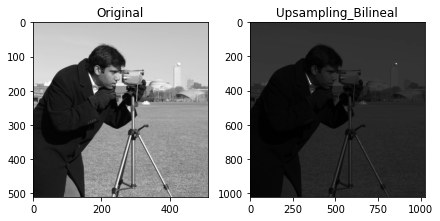

In [87]:

#@title _Cargar imagen_ seleccione la imagen que desea procesar y el tipo de procesamiento

_im = 'imageio:camera.png'  #@param ['imageio:astronaut.png','imageio:camera.png','imageio:checkerboard.png', 'imageio:chelsea.png', 'imageio:coffee.png','imageio:wikkie.png']
procesamiento = 'Upsampling_Bilineal' #@param ['Upsampling_Constante','Upsampling_Bilineal', 'Upsampling_Bicubico', 'Downsampling_Constante', 'Downsampling_Bilineal', 'Downsampling_Bicubico', 'Cuantizacion_uniforme', 'Dithering','Difusion ' ]

im = np.clip(imageio.imread(_im)/255.,0.,1.).astype(np.float)
level = 3

if procesamiento == 'Upsampling_Constante' :
  im_processed = Upsampling_constant(im)

if procesamiento == 'Upsampling_Bilineal' :
  im_processed = Upsampling_bilineal(im)

if procesamiento == 'Upsampling_Bicubico' :
  im_processed = Upsampling_bicubic(im)

if procesamiento == 'Downsampling_Constante' :
  im_processed = Downsampling_constant(im)

if procesamiento == 'Downsampling_Bilineal' :
  im_processed = Downsampling_bilineal(im)

if procesamiento == 'Downsampling_Bicubico' :
  im_processed = Downsampling_bicubic(im)

if procesamiento == 'Cuantizacion_uniforme' :
  im_processed = cuantization_uniform(im,level)

if procesamiento == 'Dithering' :
  im_processed =  dithering(im,level)

if procesamiento == 'Difusion ' :
 im_processed = diffusion(im,level)

fig, ax = plt.subplots(1, 2, constrained_layout=True)
original =ax[0].imshow(im, cmap = 'gray')
ax[0].set_title('Original')
processed = ax[1].imshow(im_processed, cmap = 'gray')
ax[1].set_title(str(procesamiento))
plt.savefig(str(procesamiento)+'.png')
plt.show()







Al momento de la entrega no he podido hacer funcionar el remuestreo en imagenes RGB, solo en escala de grises y me estony encontrando con ciertos problemas en el downsampling, en bicubico y bilineal no me estaría dando el resultado esperado, solo imagen en negro. En cuanto al upsample bicubico me da una imagen mas luminosa y el bilineal una imagen notablemente mas oscura.
De momento no he podido implementar las rutinas de cuantizacion